In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [7]:
G = 6.67e-11

class Planet:
    # name; position x, y, z; velocity v_x, v_y, v_z; mass m; distance r from sun
    def __init__(self, name, x, y, z, v_x, v_y, v_z, mass, r):
        self.name = name
        self.x = x
        self.y = y
        self.z = z
        self.v_x = v_x
        self.v_y = v_y
        self.v_z = v_z
        self.mass = mass
        self.r = r
        
# kinematic equations
def newVelocity(t, v, a):
    ''' Compute velocity at time t.
    Args:
        t: int
            Time.
        v: int
            Current velocity.
        a: int
            Acceleration
    '''
    return v + a*t

def newPosition(t, r, v, a):
    ''' Compute position at time t.
    Args:
        t: int
            Time.
        r: int
            Current Position.
        v: int
            Current velocity.
        a: int
            acceleration.
    '''
    return (r + v*t + (a/2)*t**2)

# determine the total acceleration of a particular planet by summing the contribution of each of the other planets
# to the total acceleration of a particular planet (mainPlanet) 
def planetAcceleration(mainPlanet, planetList):
    '''Compute the acceleration of mainPlanet resulting from gravitational attraction of other planets in the system.
    Args:
        mainPlanet: Planet
        planetList: [Planet]
            List of planets in the system.
    Returns:
        a_x, a_y, a_z: int, int, int
            Acceleration components of mainPlanet.
    '''
    a_x = 0
    a_y = 0
    a_z = 0
    for planet in planetList:
        if planet.name != mainPlanet.name:
            R = np.sqrt((planet.x-mainPlanet.x)**2+(planet.y-mainPlanet.y)**2+(planet.z-mainPlanet.z)**2)
            a_x += G*planet.mass*(planet.x-mainPlanet.x)/R**3
            a_y += G*planet.mass*(planet.y-mainPlanet.y)/R**3
            a_z += G*planet.mass*(planet.z-mainPlanet.z)/R**3
    return a_x, a_y, a_z


def updateSystem(t, planetList):
    '''For a given time t, compute and update the new parameters of the planets within the given system.
    Args: 
        t: int 
            Time. 
        planetList: [Planet]
            List of planets in the system.
    Returns:
        newPositions: [[int]]
            List of planet positions. Each index corresponds to an array of a particular
            planet's x, y, z coordinates.
        newVelocities: [[int]]
            List of planet velocities. Each index corresponds to an array of a particular
            planet's x, y, z velocity components.
    '''
    newPositions = []
    newVelocities = []
    
    # compute and collect new properties before updating the system
    for planet in planetList:
        a_x, a_y, a_z = planetAcceleration(planet, planetList)
        
        new_v_x = newVelocity(t, planet.v_x, a_x)
        new_v_y = newVelocity(t, planet.v_y, a_y)
        new_v_z = newVelocity(t, planet.v_z, a_z)
        
        new_x = newPosition(t, planet.x, planet.v_x, a_x)
        new_y = newPosition(t, planet.y, planet.v_y, a_y)
        new_z = newPosition(t, planet.z, planet.v_z, a_z)
        
        newPositions.append([new_x, new_y, new_z])
        newVelocities.append([new_v_x, new_v_y, new_v_z])
        
    # update planet properties   
    for i in range(len(planetList)):
        planetList[i].x = newPositions[i][0]
        planetList[i].y = newPositions[i][1]
        planetList[i].z = newPositions[i][2]
        planetList[i].v_x = newVelocities[i][0]
        planetList[i].v_y = newVelocities[i][1]
        planetList[i].v_z = newVelocities[i][2]
        
    return newPositions, newVelocities

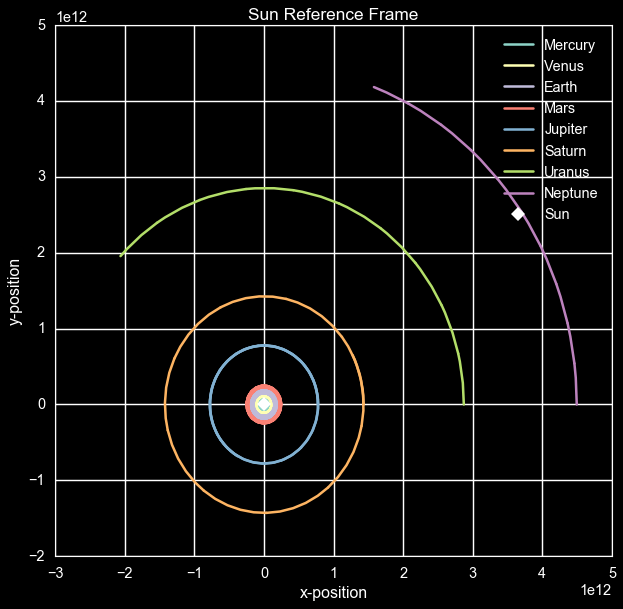

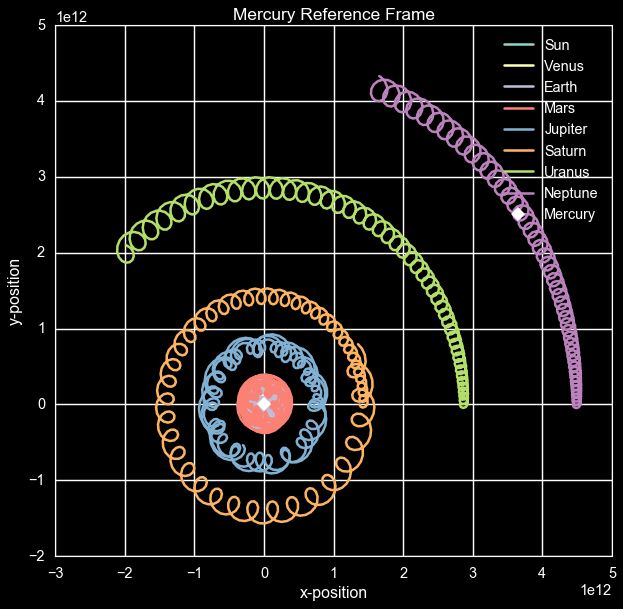

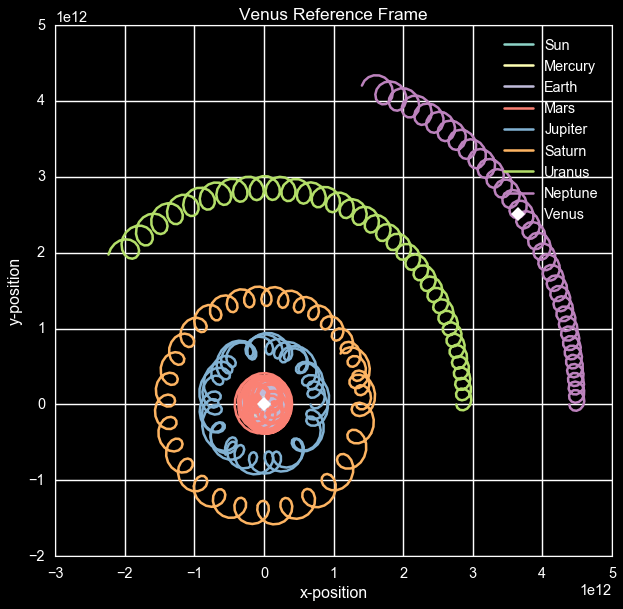

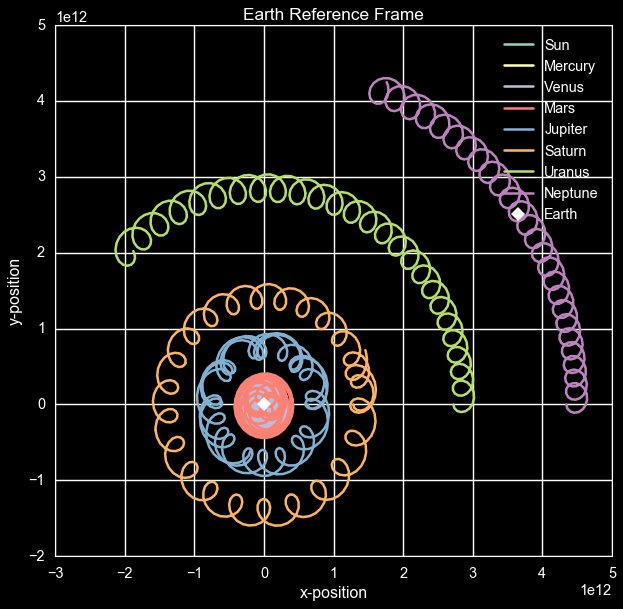

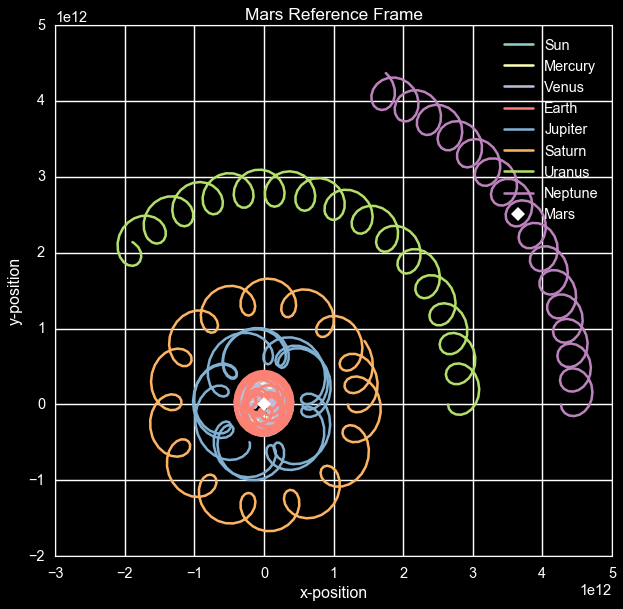

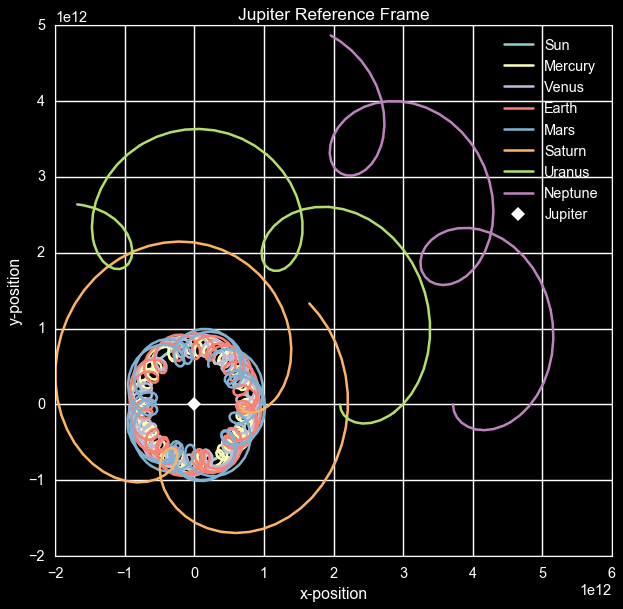

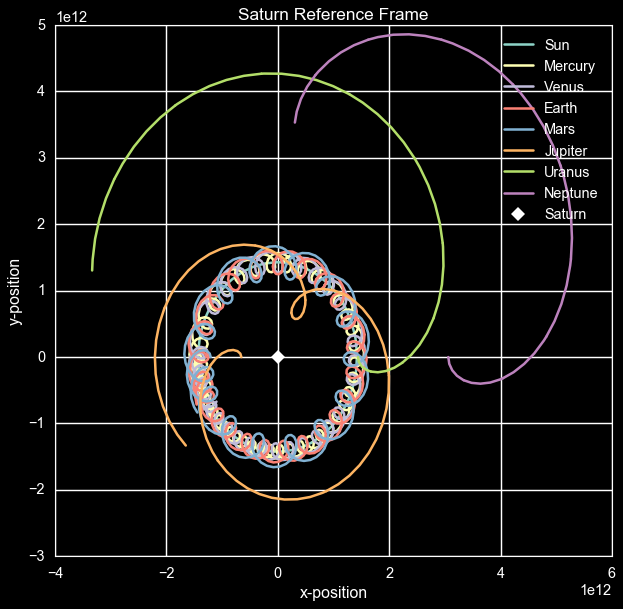

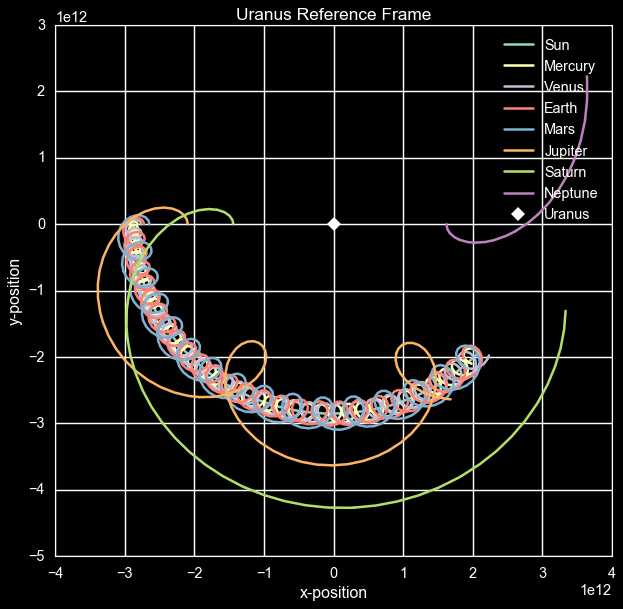

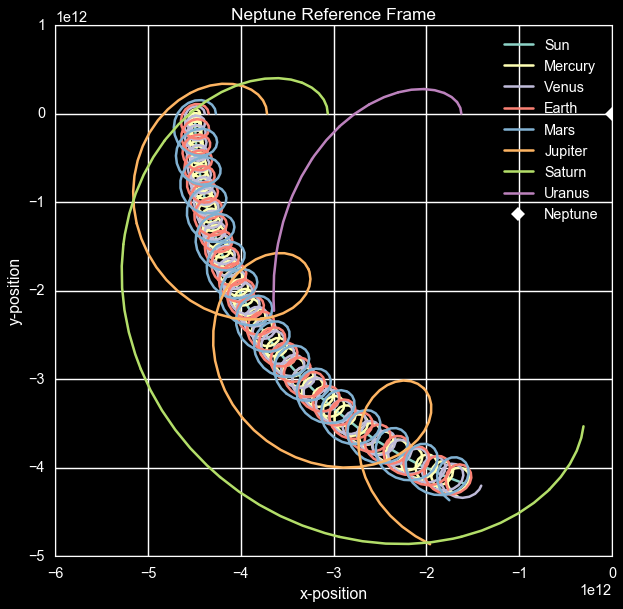

In [19]:
# this will be used to compute the initial velocity of each planet in the system
def orbitalSpeed(r, m):
    ''' Compute the orbital speed of a planet.
    Args:
        r: int
            Distance from Sun.
        m: int
            Mass.
    Returns:
        Orbital speed.
    '''
    if r < 0:
        return -np.sqrt(-G*m/r)
    return np.sqrt(G*m/r)

# the arrays below list the properties of the planets in order, in SI units for numerical values (m, kg)
NAMES = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'] 
DISTANCES = [0, 5.79e10, 1.08e11, 1.496e11, 2.279e11, 7.786e11, 1.4335e12, 2.8725e12, 4.4951e12]#, 
MASSES = [1.98854e30, 3.30200e23, 4.8685e24, 5.97219e24, 6.4185e23, 1.89813e27, 5.68319e26, 8.68103e25, 1.0241e26]#, 
RADII = [6.955e8, 2.44e6, 6.0518e6, 6.37101e6, 3.3899e6, 6.9911e7, 5.8232e7, 2.53620e7, 2.4626e7]#, 
#RADII = [6.955e8, 6.9911e7, 5.8232e7, 2.53620e7, 2.4626e7]


# initialize system (includes the star as the first entry)
# the sun is not definitely not a planet but is defined as such in the code for convenience
planetList = []
m_sun = MASSES[0]

for i in range(len(NAMES)):
    name = NAMES[i]
    m = MASSES[i]
    r = RADII[i]
    # initially, all planets are aligned on the x axis, with initial orbital speed v_y
    x = DISTANCES[i]
    y = 0
    z = 0
    v_x = 0
    v_y = 0
    if name != 'Sun':
        v_y = orbitalSpeed(x, m_sun)
    v_z = 0
    
    planetList.append(Planet(name, x, y, z, v_x, v_y, v_z, m, r))

# time units are seconds
TIMESTEP = 10**4
SIMULATION_TIME = 10**9

times = range(0, SIMULATION_TIME, TIMESTEP)
# each index in the array below is associated to a planet
# and is an array of coordinates, each set of coordinates is associated to a given time
positions = np.zeros((len(planetList), len(times), 3))

# compute coordinates for each time for each planet and add to the list of positions
for j in range(len(times)):
    t = times[j]
    planetPositions, planetVelocities = updateSystem(TIMESTEP, planetList)
    for i in range(len(planetList)):
        positions[i][j][0] = planetPositions[i][0]
        positions[i][j][1] = planetPositions[i][1]
        positions[i][j][2] = planetPositions[i][2]

        
# create plots of the orbits - each plot places a different planet (or the Sun) at the center of the system
for mainPlanet in range(len(planetList)):
    
    # this array will define different planet orbits - makes use of the positions array
    # it will collect the positions resulting from a change in reference frame
    newPositions = np.zeros((len(positions), len(positions[0]), len(positions[0][0])))
    
    for planet in range(len(positions)):
        # the block below computes the new positions resulting from the change in reference frame
        for time in range(len(positions[i])):
            newPositions[planet][time][0] = positions[planet][time][0]-positions[mainPlanet][time][0]
            newPositions[planet][time][1] = positions[planet][time][1]-positions[mainPlanet][time][1]
            newPositions[planet][time][2] = positions[planet][time][2]-positions[mainPlanet][time][2]
    
    plt.figure(figsize=(8,8))
    TITLE = planetList[mainPlanet].name + ' Reference Frame'
    plt.title(TITLE)
    for i in range(len(positions)):
        if planetList[i].name != planetList[mainPlanet].name:
            plt.plot([p[0] for p in newPositions[i]], [p[1] for p in newPositions[i]], label = planetList[i].name)
    # separately plot the main planet at the center of the system as a white diamond
    plt.plot(0, 0, 'wD', label = planetList[mainPlanet].name)
    plt.xlabel('x-position')
    plt.ylabel('y-position')
    plt.legend()
    plt.show()